# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from column_names import quanti_var, quali_var

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "data/train.csv",
    index_col="id",
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [4]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 1235 individus.


In [6]:
TARGET = "outcome"

#### Variables

#### Conversion de type

In [7]:
df[quali_var] = df[quali_var].astype(str).astype("category")  # todo: convertir uniquement les variables INT en category

In [8]:
X = df.copy()[quanti_var + quali_var]
y = df.copy()[TARGET]

In [9]:
df[quanti_var].head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
id,,,,,,,,,,,
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0


In [10]:
df[quali_var].head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
id,,,,,,,,,,,,,,,,
0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,yes,no
1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,yes,no
2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,None,distend_large,serosanguious,yes,no
3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,yes,yes
4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,no,yes


In [11]:
df[TARGET].head()

id
0          died
1    euthanized
2         lived
3         lived
4         lived
Name: outcome, dtype: object

# Découverte des données

## Analyse univariée

In [12]:
df.nunique()

surgery                    2
age                        2
hospital_number          255
rectal_temp               43
pulse                     50
respiratory_rate          37
temp_of_extremities        5
peripheral_pulse           5
mucous_membrane            7
capillary_refill_time      4
pain                       7
peristalsis                6
abdominal_distention       5
nasogastric_tube           4
nasogastric_reflux         5
nasogastric_reflux_ph     26
rectal_exam_feces          6
abdomen                    6
packed_cell_volume        49
total_protein             83
abdomo_appearance          4
abdomo_protein            54
surgical_lesion            2
lesion_1                  57
lesion_2                   4
lesion_3                   2
cp_data                    2
outcome                    3
dtype: int64

In [13]:
df[quanti_var].describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [14]:
df[quali_var].describe()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
count,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
unique,2,2,5,5,7,4,7,6,5,4,5,6,6,4,2,2
top,yes,adult,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes
freq,887,1160,700,724,284,834,429,664,543,758,604,493,482,570,929,668


# Visualisation

## Variables quantitatives

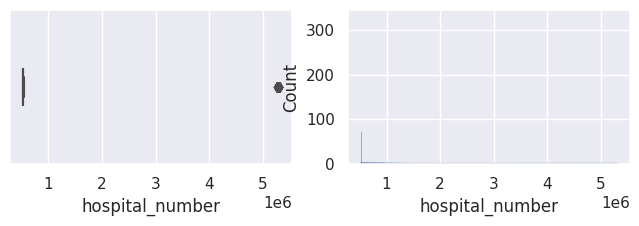

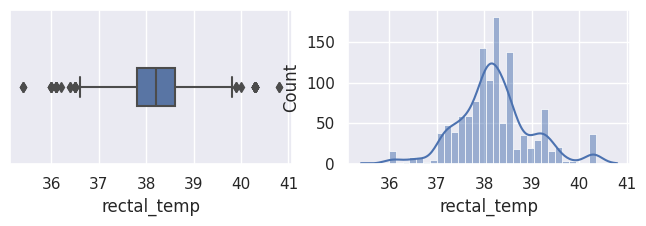

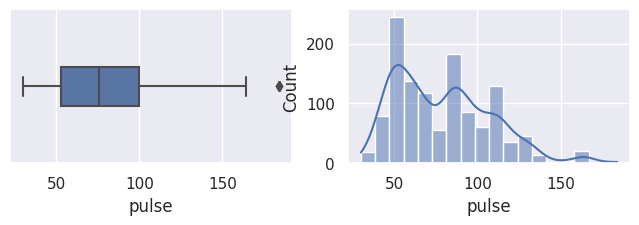

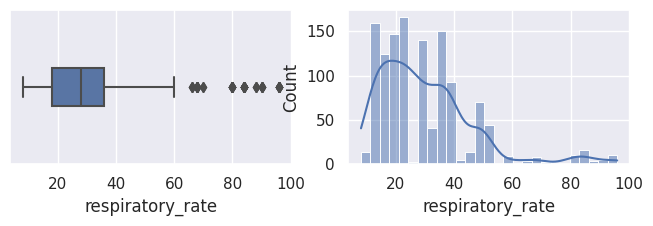

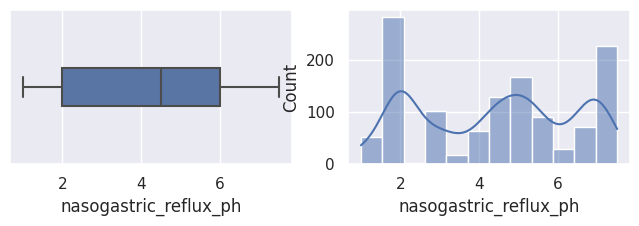

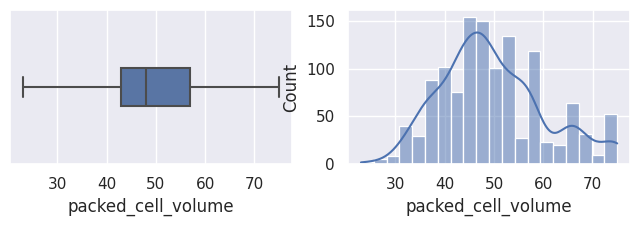

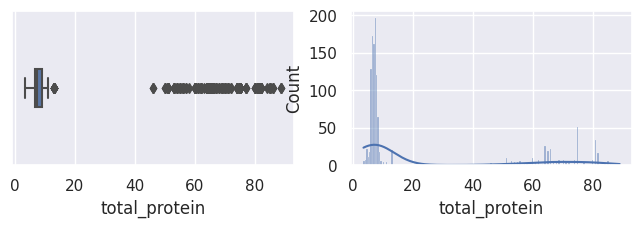

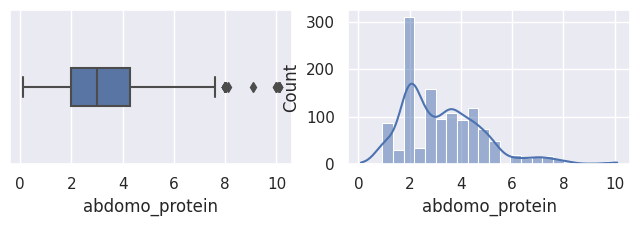

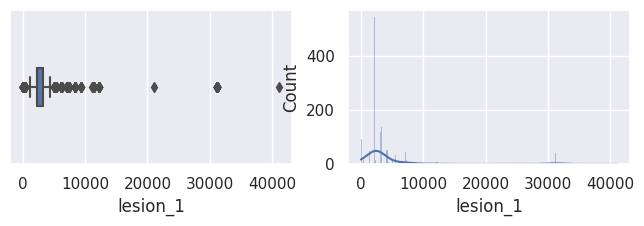

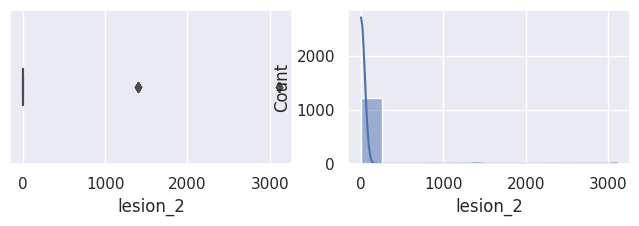

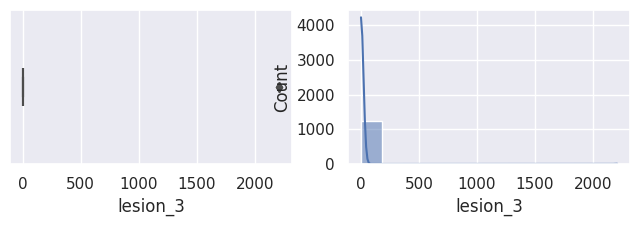

In [15]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(x=df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

/home/ab2/.cache/pypoetry/virtualenvs/kaggle-competitions-qudAJOav-py3.10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

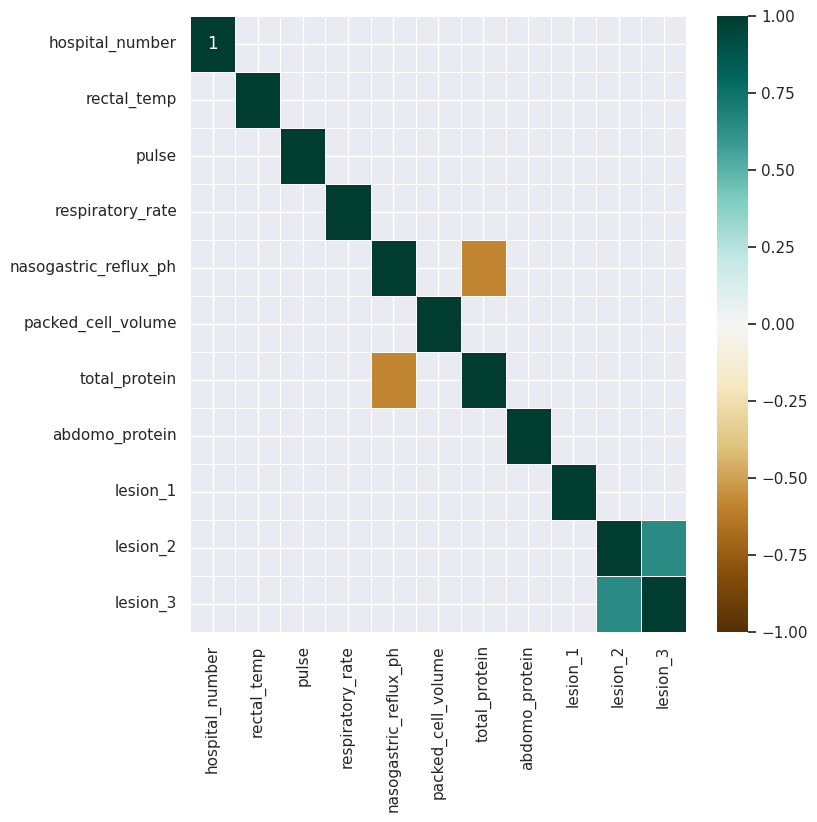

In [17]:
plt.figure(figsize=(8, 8))

TRESHOLD = 0.5

sns.heatmap(
    df[quanti_var].corr()[df[quanti_var].corr().abs() > TRESHOLD],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

### Valeurs manquantes

In [18]:
df_na = df[quanti_var].isna()
df_na_sum = df_na.sum()

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='id'>

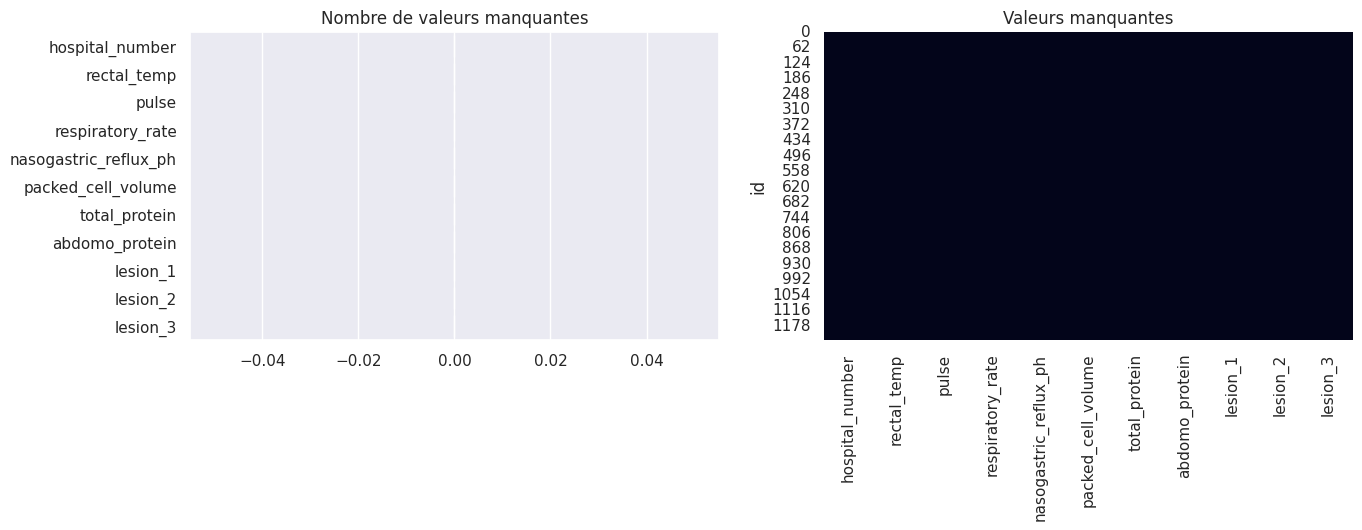

In [19]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
sns.barplot(x=df_na_sum.values, y=df_na_sum.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df_na, cbar=False, ax=ax[1])

In [21]:
df[quanti_var].isna().sum()

hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

## Variables qualitatives

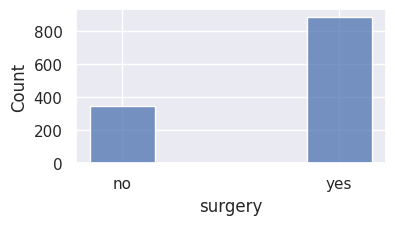

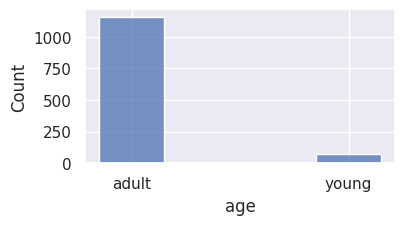

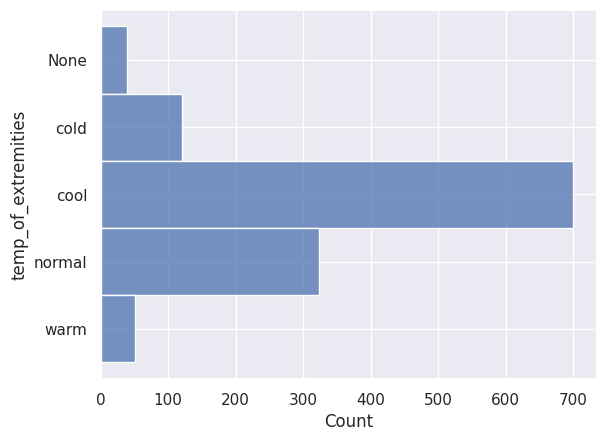

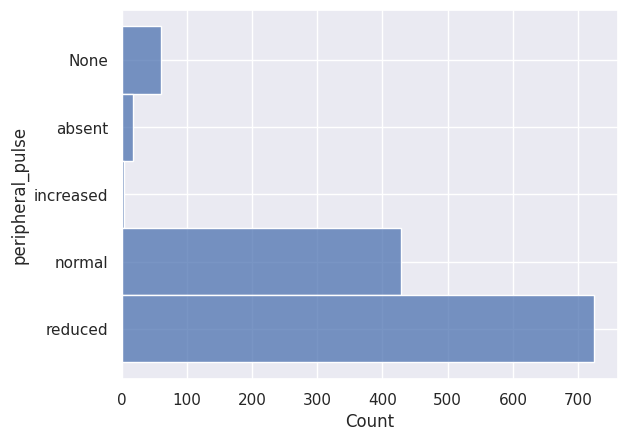

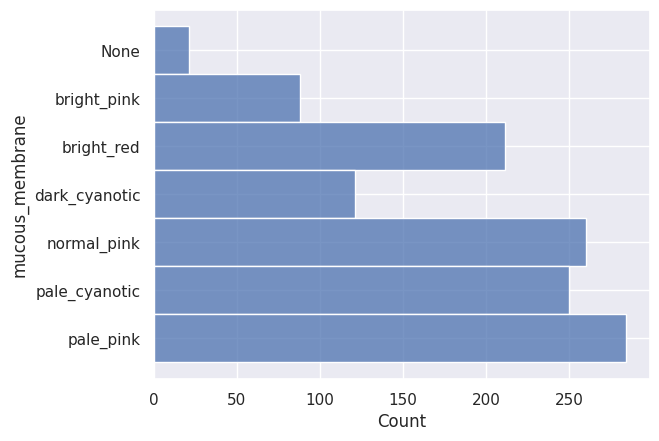

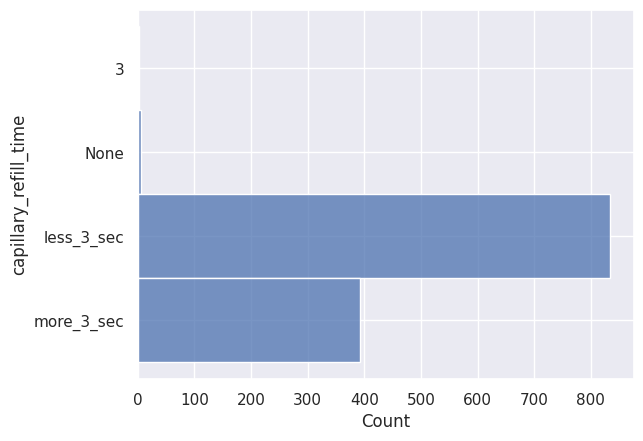

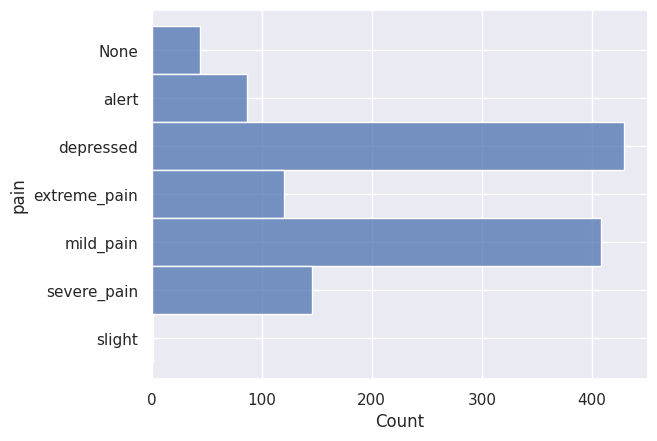

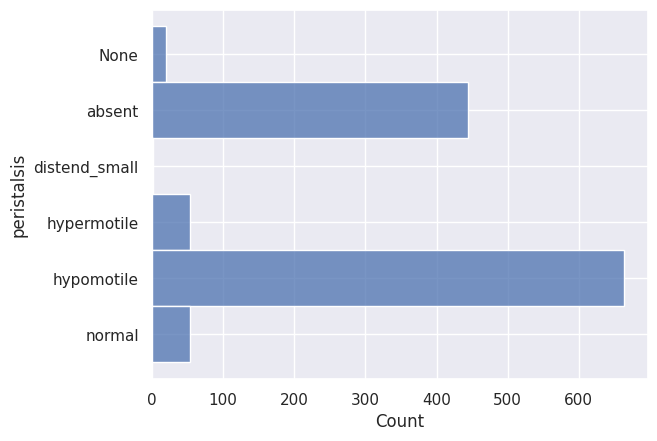

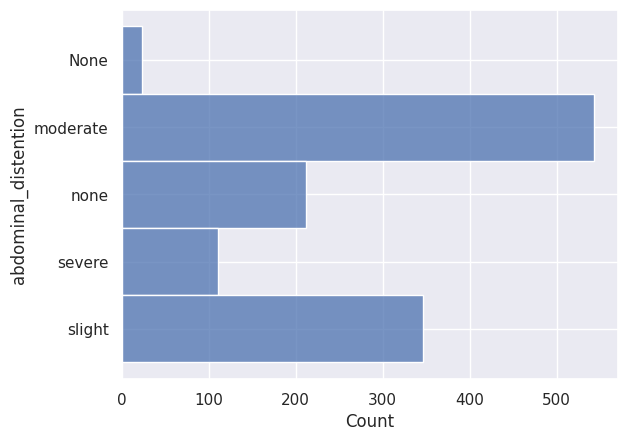

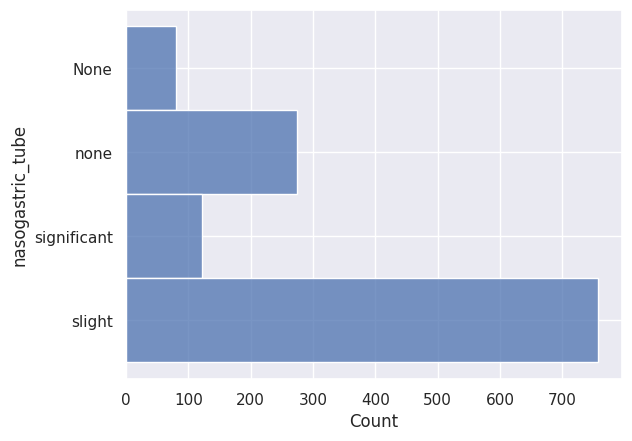

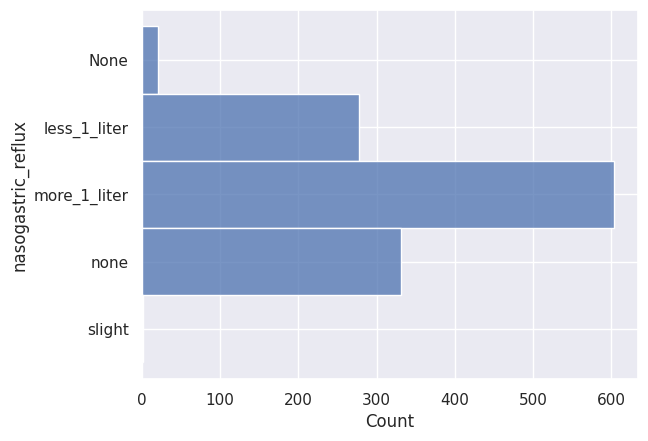

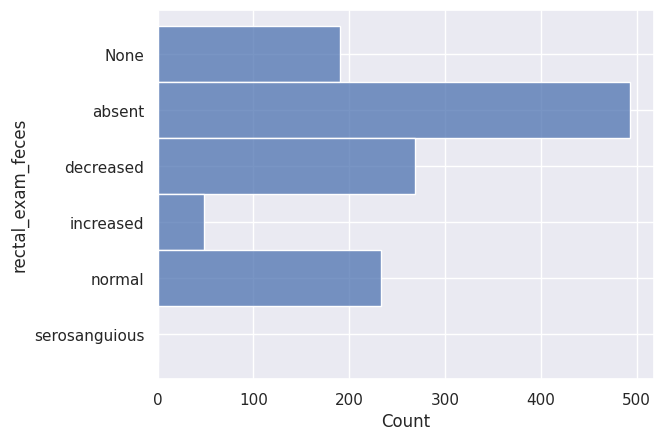

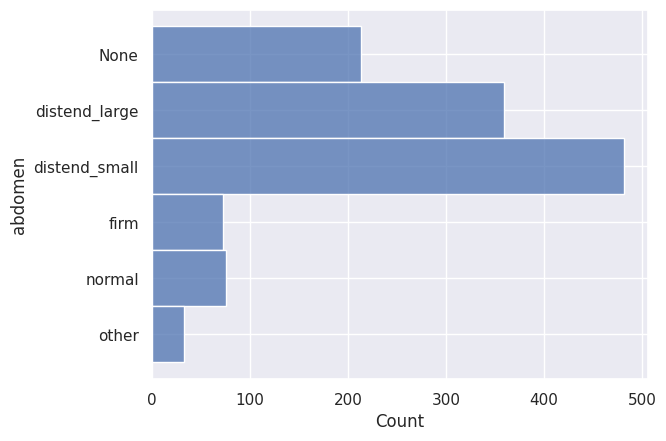

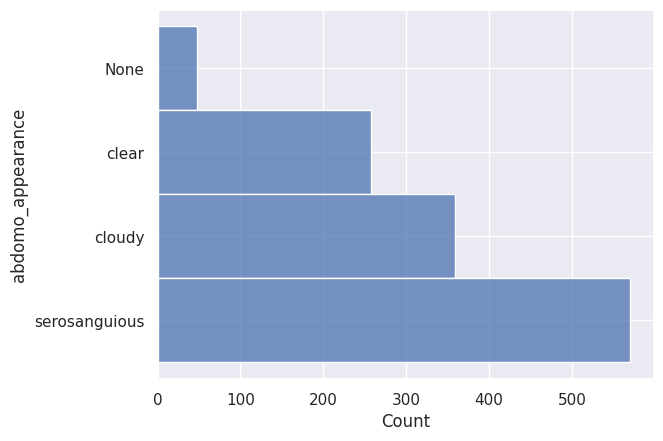

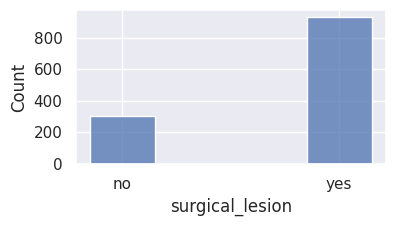

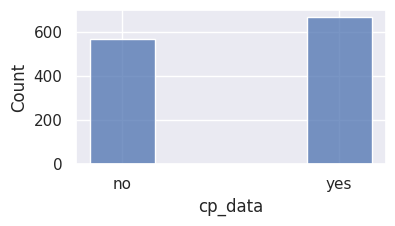

In [22]:
for var in quali_var:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

### Valeurs manquantes

In [23]:
df_na = df[quali_var] == "nan"
df_na_sum = df_na.sum()

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='id'>

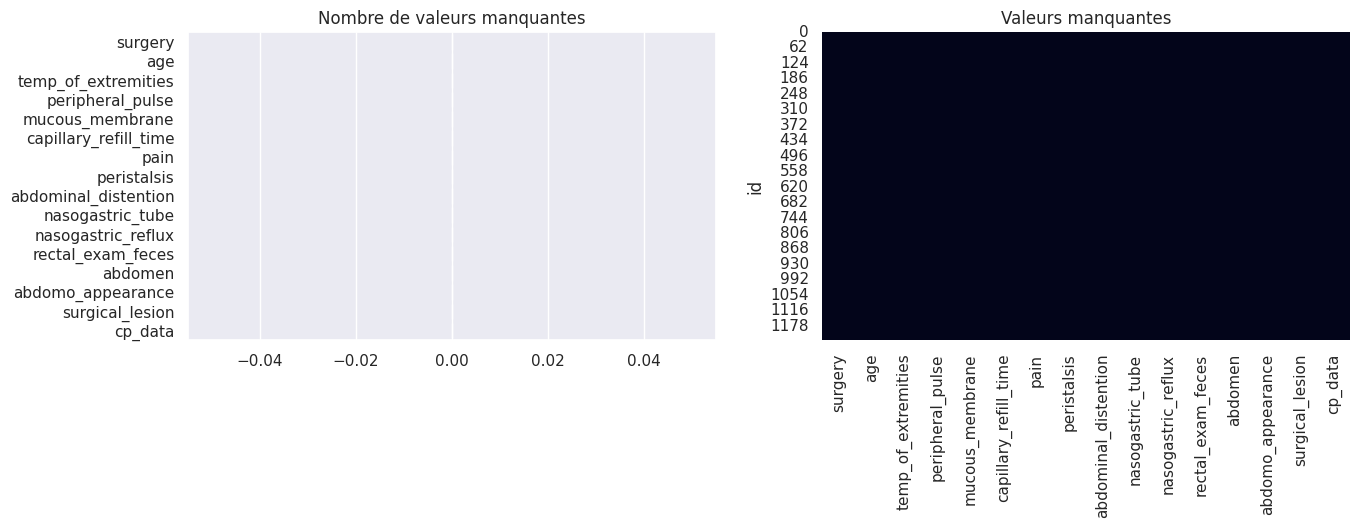

In [24]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
sns.barplot(x=df_na_sum.values, y=df_na_sum.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df_na, cbar=False, ax=ax[1])

In [25]:
df_na_sum

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
dtype: int64

### Variable cible

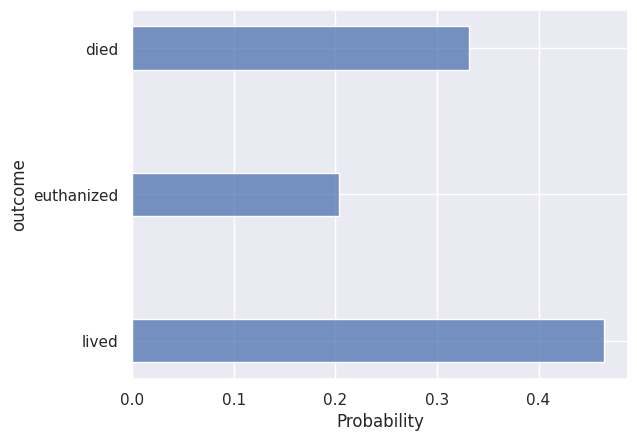

In [30]:
sns.histplot(y=y.astype(str), shrink=0.3, stat="probability")
plt.show()

In [31]:
pd.concat((
    y.value_counts(),
    y.value_counts(normalize=True)
), axis=1)

,outcome,outcome
lived,574,0.464777
died,410,0.331984
euthanized,251,0.203239


## Variable cible en fonction des autres variables

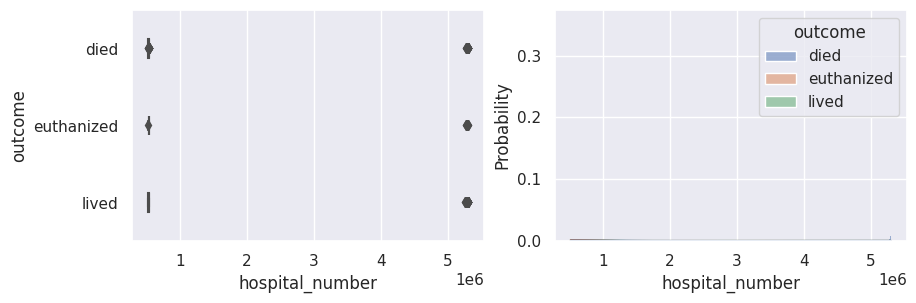

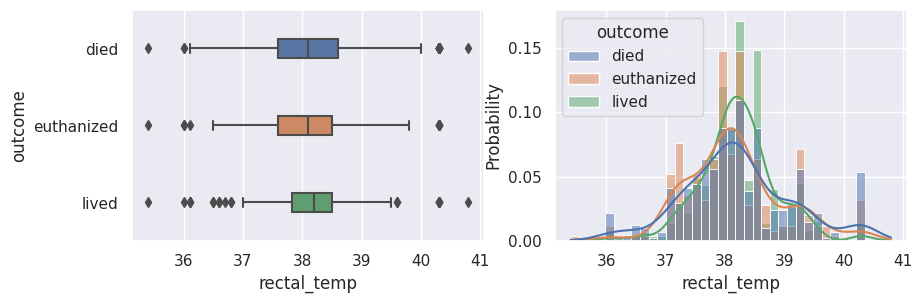

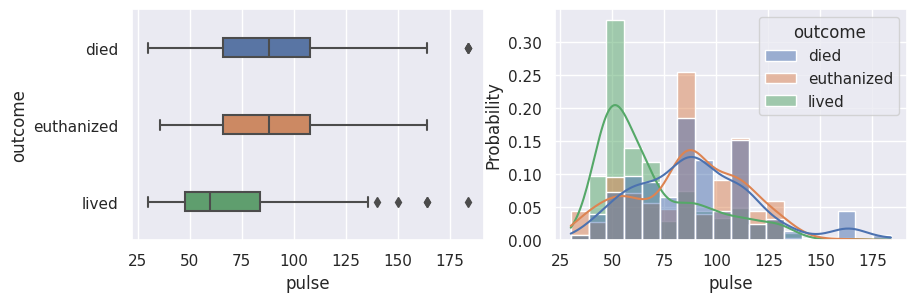

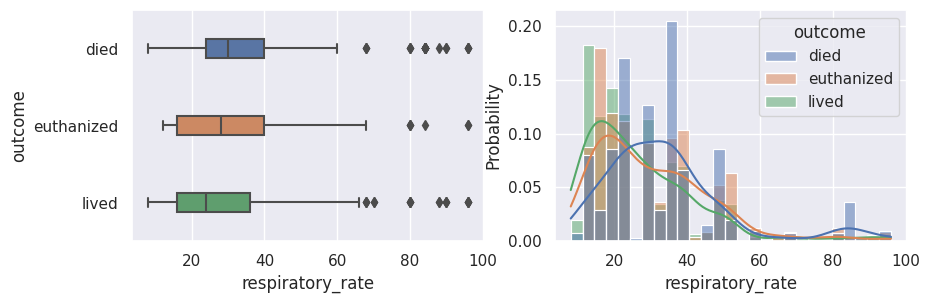

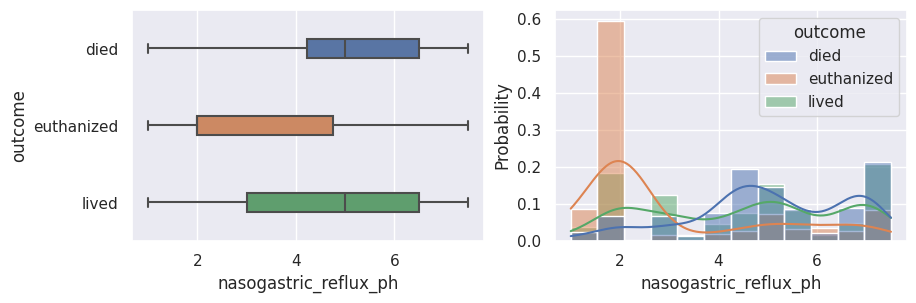

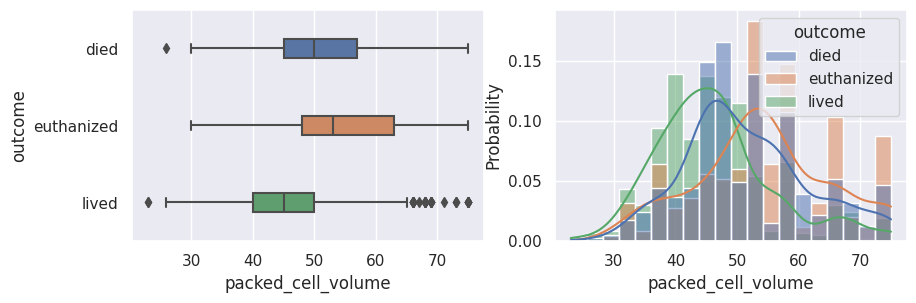

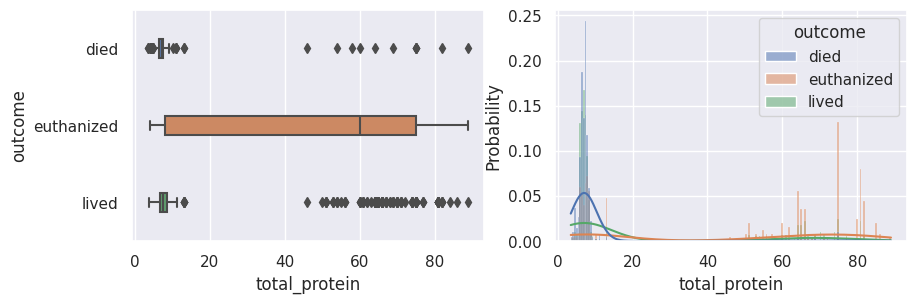

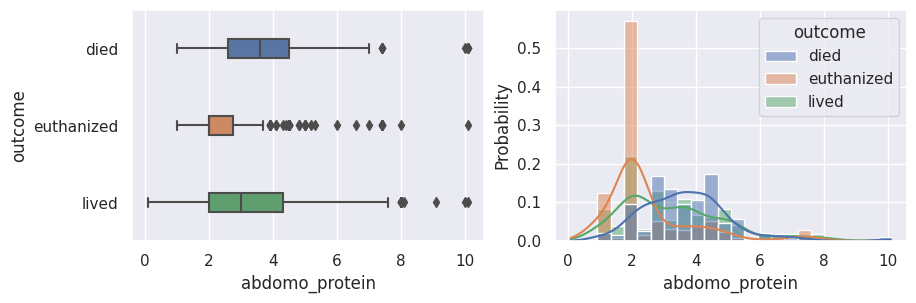

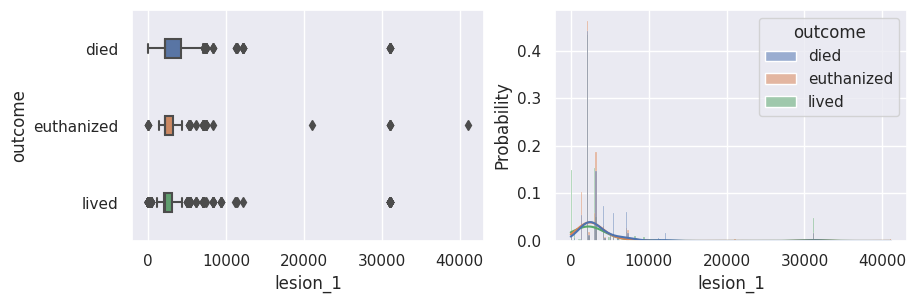

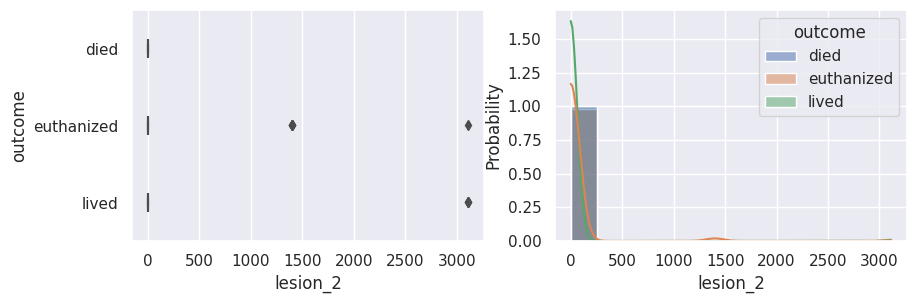

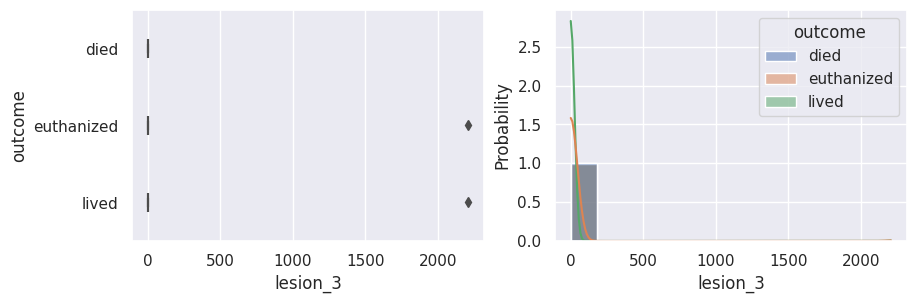

In [33]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.boxplot(df, x=df[var], y=df[TARGET], width=0.25, ax=ax[0])

    sns.histplot(
        df,
        x=df[var],
        kde=True,
        ax=ax[1],
        hue=df[TARGET],
        stat="probability",
        common_norm=False,
    )

    plt.show()

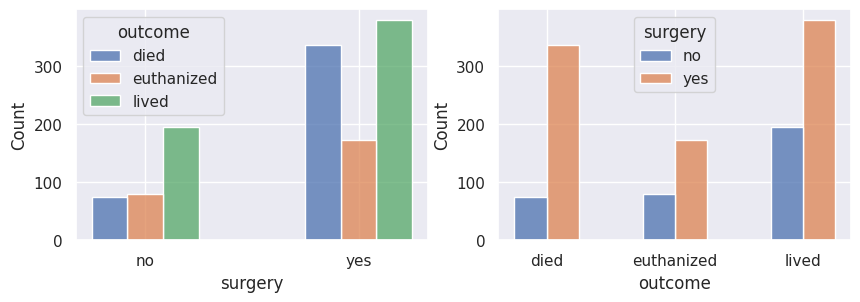

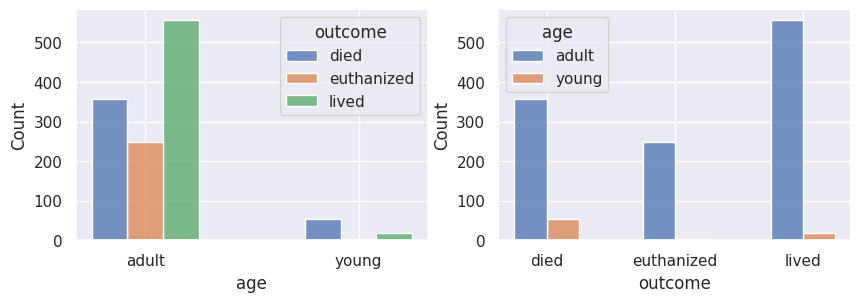

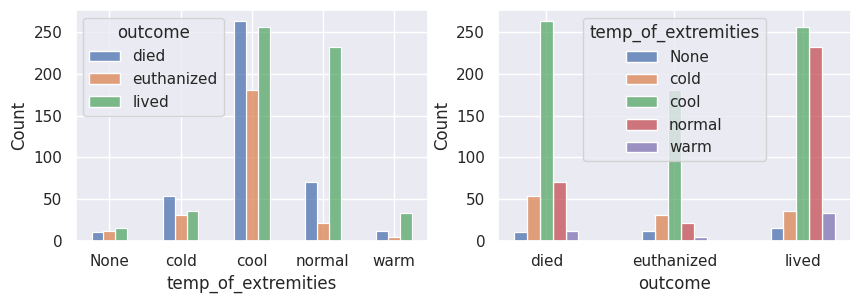

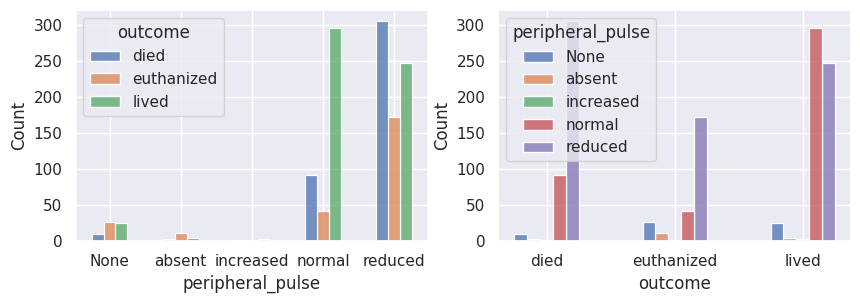

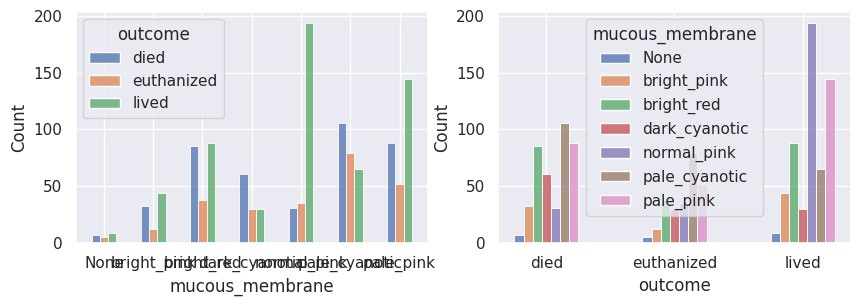

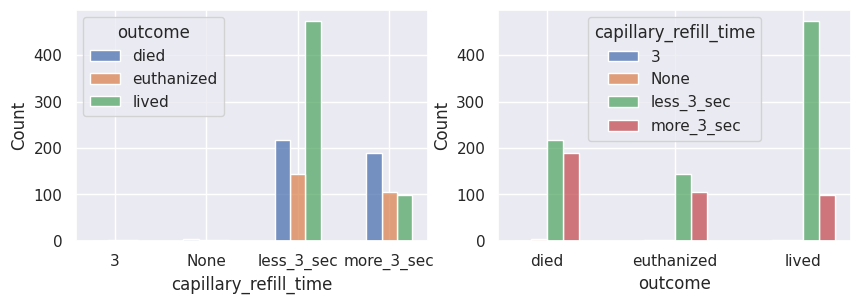

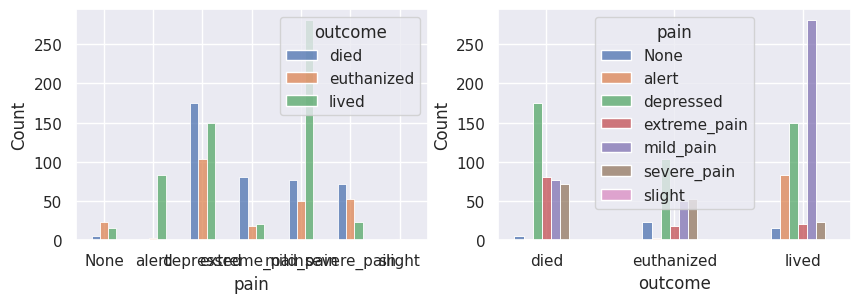

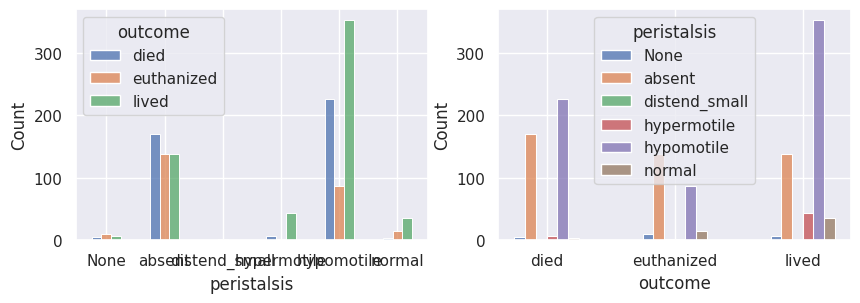

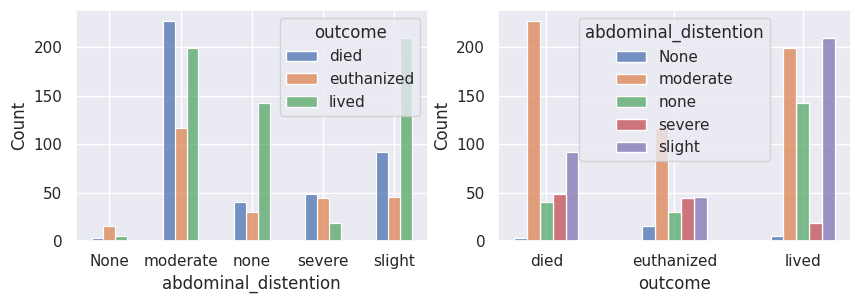

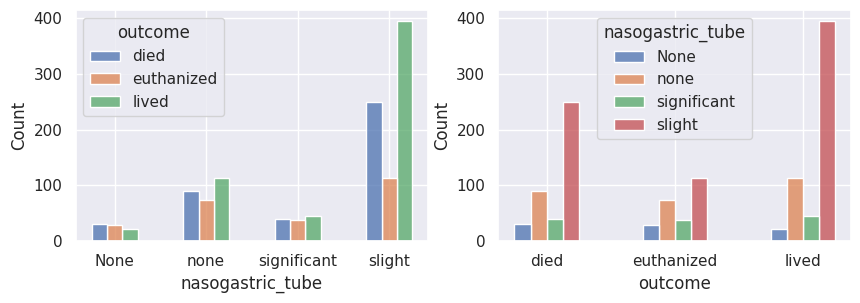

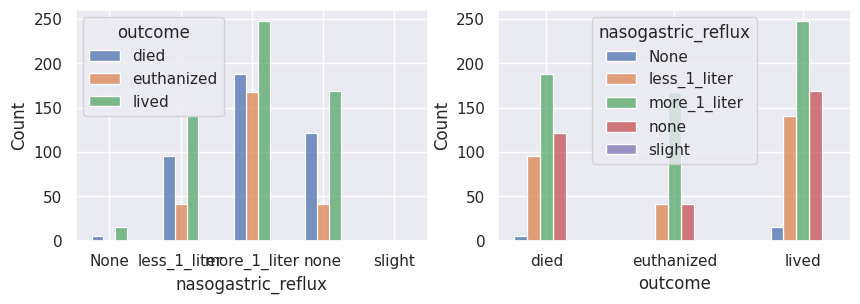

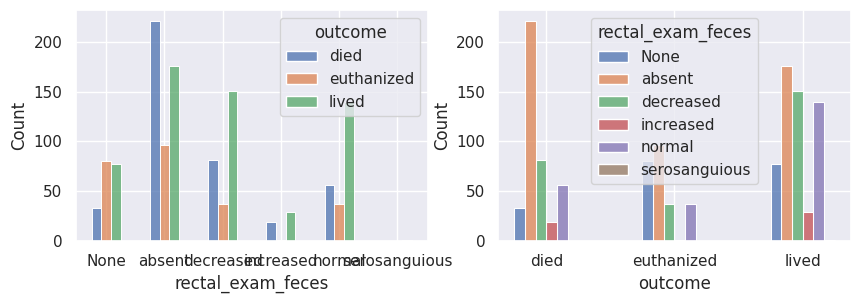

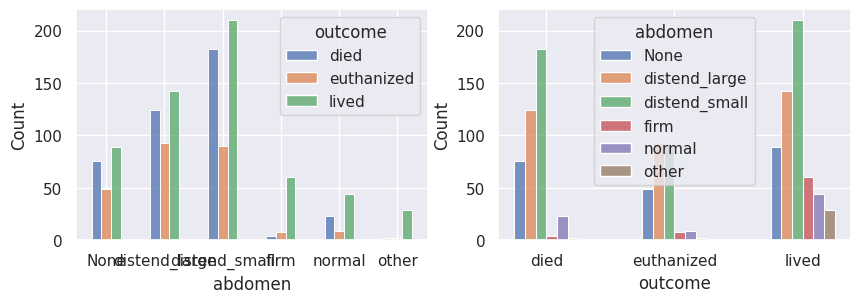

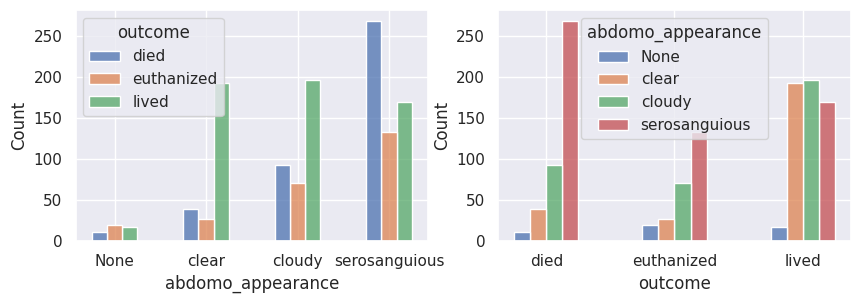

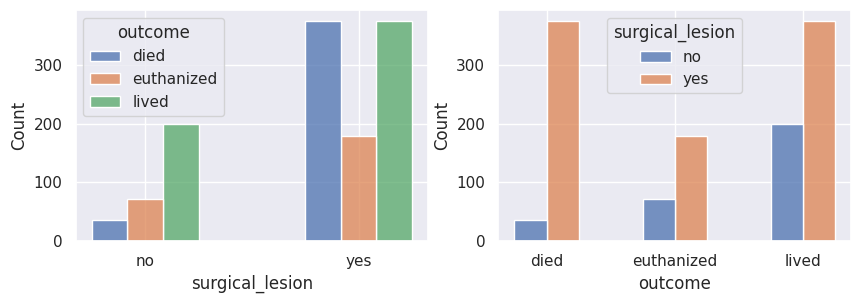

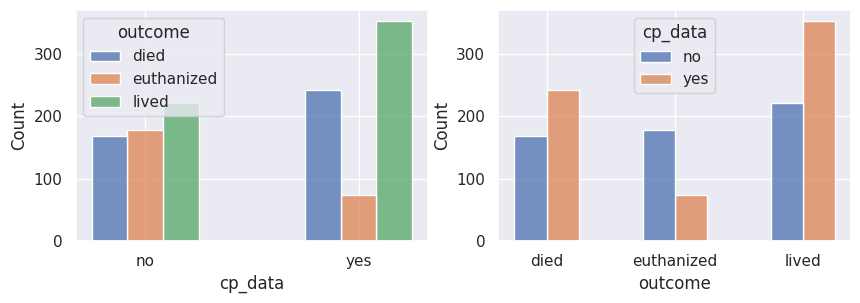

In [34]:
for var in quali_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(
        df,
        x=df[var],
        hue=df[TARGET],
        multiple="dodge",
        shrink=0.5,
        ax=ax[0],
    )

    sns.histplot(
        df,
        hue=df[var],
        x=df[TARGET],
        multiple="dodge",
        shrink=0.5,
        ax=ax[1],
    )

    plt.show()

# Sauvegarde du Dataframe

In [35]:
df.to_csv("data/data.csv")